In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import itertools
%matplotlib inline

# Cecal

In [95]:
TRF_metadata = pd.read_csv('../data/TRF/CA_TRF_metadata.txt', 
                            sep='\t', usecols=['#SampleID', 'group_time'])
TRF_metadata.head()

,#SampleID,group_time
0,FA1a,FA_13
1,FA1b,FA_13
2,FA1c,FA_13
3,FA2a,FA_17
4,FA2b,FA_17


In [96]:
cTRF_metadata = TRF_metadata.copy()

In [97]:
cTRF_metadata['#SampleID'] = 'c' + cTRF_metadata['#SampleID'].astype(str)
cTRF_metadata.head()

,#SampleID,group_time
0,cFA1a,FA_13
1,cFA1b,FA_13
2,cFA1c,FA_13
3,cFA2a,FA_17
4,cFA2b,FA_17


In [98]:
cTRF_metadata.set_index('#SampleID', inplace=True)

In [99]:
cTRF_metadata.tail()

,group_time
#SampleID,
cNT5b,NT_5
cNT5c,NT_5
cNT6a,NT_9
cNT6b,NT_9
cNT6c,NT_9


In [100]:
TRF_wUF_dm = pd.read_csv('../data/TRF/cecum_weighted_unifrac_dm.tsv', sep='\t', index_col=0)
TRF_wUF_dm.head()

,cFA1a,cFA1b,cFA1c,cFA2a,cFA2b,cFA2c,cFA3a,cFA3b,cFA3c,cFA4a,...,cNT3b,cNT3c,cNT4a,cNT4b,cNT4c,cNT5a,cNT5b,cNT5c,cNT6a,cNT6c
cFA1a,0.000000,0.167388,0.130302,0.207368,0.244823,0.181487,0.228121,0.185964,0.208308,0.205371,...,0.908996,0.346156,0.715543,0.385542,0.591844,1.000570,0.960059,0.844799,0.703712,0.601717
cFA1b,0.167388,0.000000,0.165829,0.243735,0.252923,0.221356,0.269632,0.159442,0.255149,0.260326,...,0.907644,0.322066,0.653940,0.335707,0.553336,0.912723,0.871472,0.746990,0.638031,0.587901
cFA1c,0.130302,0.165829,0.000000,0.136489,0.154124,0.144793,0.157955,0.126131,0.157435,0.128622,...,0.850755,0.270834,0.757625,0.422940,0.667271,0.986553,0.938684,0.829612,0.725766,0.685194
cFA2a,0.207368,0.243735,0.136489,0.000000,0.064693,0.090739,0.073865,0.125222,0.061514,0.062345,...,0.845221,0.310257,0.849013,0.520655,0.756804,1.009706,0.963138,0.852949,0.819683,0.779300
cFA2b,0.244823,0.252923,0.154124,0.064693,0.000000,0.124871,0.090247,0.154940,0.097294,0.085467,...,0.834171,0.299595,0.847063,0.516437,0.760999,1.010236,0.958877,0.850901,0.813991,0.776850


In [101]:
named_TRF_wUF_dm = pd.merge(cTRF_metadata, TRF_wUF_dm, left_index=True, right_index=True)
named_TRF_wUF_dm.head()

,group_time,cFA1a,cFA1b,cFA1c,cFA2a,cFA2b,cFA2c,cFA3a,cFA3b,cFA3c,...,cNT3b,cNT3c,cNT4a,cNT4b,cNT4c,cNT5a,cNT5b,cNT5c,cNT6a,cNT6c
cFA1a,FA_13,0.000000,0.167388,0.130302,0.207368,0.244823,0.181487,0.228121,0.185964,0.208308,...,0.908996,0.346156,0.715543,0.385542,0.591844,1.000570,0.960059,0.844799,0.703712,0.601717
cFA1b,FA_13,0.167388,0.000000,0.165829,0.243735,0.252923,0.221356,0.269632,0.159442,0.255149,...,0.907644,0.322066,0.653940,0.335707,0.553336,0.912723,0.871472,0.746990,0.638031,0.587901
cFA1c,FA_13,0.130302,0.165829,0.000000,0.136489,0.154124,0.144793,0.157955,0.126131,0.157435,...,0.850755,0.270834,0.757625,0.422940,0.667271,0.986553,0.938684,0.829612,0.725766,0.685194
cFA2a,FA_17,0.207368,0.243735,0.136489,0.000000,0.064693,0.090739,0.073865,0.125222,0.061514,...,0.845221,0.310257,0.849013,0.520655,0.756804,1.009706,0.963138,0.852949,0.819683,0.779300
cFA2b,FA_17,0.244823,0.252923,0.154124,0.064693,0.000000,0.124871,0.090247,0.154940,0.097294,...,0.834171,0.299595,0.847063,0.516437,0.760999,1.010236,0.958877,0.850901,0.813991,0.776850


In [102]:
named2_TRF_wUF_dm = named_TRF_wUF_dm.set_index('group_time')

In [103]:
Named_TRF_wUF_dm = cTRF_metadata.copy()
Named_TRF_wUF_dm.head()

,group_time
#SampleID,
cFA1a,FA_13
cFA1b,FA_13
cFA1c,FA_13
cFA2a,FA_17
cFA2b,FA_17


In [104]:
named3_TRF_wUF_dm = pd.merge(named2_TRF_wUF_dm.T, Named_TRF_wUF_dm, left_index=True, right_index=True)
named4_TRF_wUF_dm = named3_TRF_wUF_dm.set_index('group_time')
named4_TRF_wUF_dm

,FA_13,FA_13,FA_13,FA_17,FA_17,FA_17,FA_21,FA_21,FA_21,FA_1,...,NT_21,NT_21,NT_1,NT_1,NT_1,NT_5,NT_5,NT_5,NT_9,NT_9
group_time,,,,,,,,,,,,,,,,,,,,,
FA_13,0.000000,0.167388,0.130302,0.207368,0.244823,0.181487,0.228121,0.185964,0.208308,0.205371,...,0.908996,0.346156,0.715543,0.385542,0.591844,1.000570,0.960059,0.844799,0.703712,0.601717
FA_13,0.167388,0.000000,0.165829,0.243735,0.252923,0.221356,0.269632,0.159442,0.255149,0.260326,...,0.907644,0.322066,0.653940,0.335707,0.553336,0.912723,0.871472,0.746990,0.638031,0.587901
FA_13,0.130302,0.165829,0.000000,0.136489,0.154124,0.144793,0.157955,0.126131,0.157435,0.128622,...,0.850755,0.270834,0.757625,0.422940,0.667271,0.986553,0.938684,0.829612,0.725766,0.685194
FA_17,0.207368,0.243735,0.136489,0.000000,0.064693,0.090739,0.073865,0.125222,0.061514,0.062345,...,0.845221,0.310257,0.849013,0.520655,0.756804,1.009706,0.963138,0.852949,0.819683,0.779300
FA_17,0.244823,0.252923,0.154124,0.064693,0.000000,0.124871,0.090247,0.154940,0.097294,0.085467,...,0.834171,0.299595,0.847063,0.516437,0.760999,1.010236,0.958877,0.850901,0.813991,0.776850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NT_5,1.000570,0.912723,0.986553,1.009706,1.010236,0.981307,1.020205,0.939274,1.013562,1.010017,...,0.668157,0.868091,0.461382,0.733071,0.849619,0.000000,0.479662,0.593012,0.400513,0.559026
NT_5,0.960059,0.871472,0.938684,0.963138,0.958877,0.938912,0.976449,0.894787,0.970046,0.958731,...,1.110724,0.798800,0.885278,0.652700,0.640508,0.479662,0.000000,0.210477,0.742223,0.642401
NT_5,0.844799,0.746990,0.829612,0.852949,0.850901,0.818249,0.864927,0.778305,0.858904,0.855257,...,1.240686,0.765426,0.951782,0.630293,0.515547,0.593012,0.210477,0.000000,0.831300,0.681938


In [105]:
named5_TRF_wUF_dm = named4_TRF_wUF_dm.filter(regex='FA')
named6_TRF_wUF_dm = named5_TRF_wUF_dm.T.filter(regex='FT')
named6_TRF_wUF_dm.shape

(18, 18)

In [106]:
named6_TRF_wUF_dm

group_time,FT_13,FT_13,FT_13,FT_17,FT_17,FT_17,FT_21,FT_21,FT_21,FT_1,FT_1,FT_1,FT_5,FT_5,FT_5,FT_9,FT_9,FT_9
FA_13,0.239212,0.192646,0.197971,0.245957,0.216279,0.290024,0.249331,0.299948,0.204508,0.201201,0.245328,0.177921,0.214150,0.187267,0.186073,0.182029,0.266560,0.181905
FA_13,0.271694,0.246724,0.259293,0.278214,0.270591,0.255651,0.259191,0.276806,0.268714,0.268030,0.182119,0.163031,0.248940,0.260546,0.217341,0.155858,0.257205,0.208401
FA_13,0.159487,0.131705,0.161589,0.154730,0.130005,0.203960,0.156431,0.210238,0.151141,0.129479,0.222517,0.144545,0.130366,0.138942,0.111301,0.188299,0.200914,0.143033
FA_17,0.132785,0.109245,0.096005,0.100479,0.075177,0.175944,0.093194,0.208196,0.065927,0.084011,0.239149,0.153749,0.090752,0.100451,0.078951,0.194614,0.190570,0.161623
FA_17,0.126368,0.130344,0.138280,0.084949,0.084534,0.161441,0.069387,0.185727,0.096859,0.104323,0.243005,0.173702,0.094976,0.127830,0.104614,0.224580,0.177958,0.183552
FA_17,0.172859,0.074739,0.075249,0.143534,0.121402,0.210972,0.142539,0.226487,0.093993,0.108111,0.219501,0.138442,0.123418,0.079356,0.080624,0.154244,0.206667,0.135922
FA_21,0.147262,0.123716,0.110313,0.079424,0.075335,0.191856,0.066915,0.221413,0.049018,0.096919,0.244327,0.166976,0.104248,0.114299,0.101975,0.210505,0.201145,0.169762
FA_21,0.172373,0.130601,0.159157,0.161618,0.142178,0.191383,0.154067,0.236468,0.143648,0.135915,0.159873,0.102569,0.144899,0.145067,0.120895,0.112701,0.192897,0.123127
FA_21,0.151323,0.110462,0.085725,0.103544,0.081787,0.188102,0.087691,0.227376,0.044915,0.088339,0.250653,0.161100,0.113978,0.105414,0.103573,0.194822,0.197040,0.169610
FA_1,0.107877,0.085533,0.109996,0.084481,0.065164,0.167302,0.087004,0.184415,0.079003,0.057029,0.242179,0.150402,0.074694,0.095564,0.074517,0.196575,0.176271,0.160262


In [107]:
wufdm = named6_TRF_wUF_dm.copy()
wufdm2 = wufdm.stack().reset_index()
wufdm2.columns = ['HFD_adlib','HFD_TRF','wUF_distance']
wufdm2

,HFD_adlib,HFD_TRF,wUF_distance
0,FA_13,FT_13,0.239212
1,FA_13,FT_13,0.192646
2,FA_13,FT_13,0.197971
3,FA_13,FT_17,0.245957
4,FA_13,FT_17,0.216279
...,...,...,...
319,FA_9,FT_5,0.180633
320,FA_9,FT_5,0.153575
321,FA_9,FT_9,0.151656
322,FA_9,FT_9,0.149749


In [108]:
wufdm2['timepoints'] = wufdm2['HFD_adlib'].str.split('_').str[1] + "_" + wufdm2['HFD_TRF'].str.split('_').str[1]
wufdm2.timepoints.unique()

array(['13_13', '13_17', '13_21', '13_1', '13_5', '13_9', '17_13',
       '17_17', '17_21', '17_1', '17_5', '17_9', '21_13', '21_17',
       '21_21', '21_1', '21_5', '21_9', '1_13', '1_17', '1_21', '1_1',
       '1_5', '1_9', '5_13', '5_17', '5_21', '5_1', '5_5', '5_9', '9_13',
       '9_17', '9_21', '9_1', '9_5', '9_9'], dtype=object)

In [109]:
zt_tps = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

In [110]:
wufdm3 = wufdm2.loc[wufdm2['timepoints'].isin(zt_tps)]
wufdm3

,HFD_adlib,HFD_TRF,wUF_distance,timepoints
0,FA_13,FT_13,0.239212,13_13
1,FA_13,FT_13,0.192646,13_13
2,FA_13,FT_13,0.197971,13_13
18,FA_13,FT_13,0.271694,13_13
19,FA_13,FT_13,0.246724,13_13
20,FA_13,FT_13,0.259293,13_13
36,FA_13,FT_13,0.159487,13_13
37,FA_13,FT_13,0.131705,13_13
38,FA_13,FT_13,0.161589,13_13
57,FA_17,FT_17,0.100479,17_17


In [111]:
wufdm4 = wufdm3.copy()
wufdm4['ZT'] = wufdm4['timepoints'].str.split('_').str[-1]
wufdm4['Controls'] = wufdm4['HFD_adlib'].str.split('_').str[0]
wufdm4['Experimentals'] = wufdm4['HFD_TRF'].str.split('_').str[0]
wufdm4

,HFD_adlib,HFD_TRF,wUF_distance,timepoints,ZT,Controls,Experimentals
0,FA_13,FT_13,0.239212,13_13,13,FA,FT
1,FA_13,FT_13,0.192646,13_13,13,FA,FT
2,FA_13,FT_13,0.197971,13_13,13,FA,FT
18,FA_13,FT_13,0.271694,13_13,13,FA,FT
19,FA_13,FT_13,0.246724,13_13,13,FA,FT
20,FA_13,FT_13,0.259293,13_13,13,FA,FT
36,FA_13,FT_13,0.159487,13_13,13,FA,FT
37,FA_13,FT_13,0.131705,13_13,13,FA,FT
38,FA_13,FT_13,0.161589,13_13,13,FA,FT
57,FA_17,FT_17,0.100479,17_17,17,FA,FT


In [112]:
wufdm4.wUF_distance.mean()

0.1590485541350499

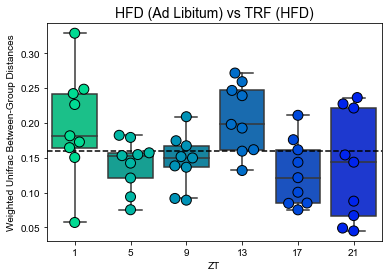

In [113]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="winter_r",
                 data=wufdm4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="ZT", y="wUF_distance", palette="winter_r", edgecolor='k', linewidth=1, size=10,
                   data=wufdm4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('HFD (Ad Libitum) vs TRF (HFD)', fontsize=14)
ax.axhline(0.1590485541350499, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_FAvFT_wUF_cecum_boxplot.svg', dpi=300, bbox_inches="tight")

In [114]:
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from itertools import combinations

In [115]:
for key in list(combinations(wufdm4.ZT.unique(), 2)):
    x = wufdm4[wufdm4["ZT"] == key[0]].wUF_distance.values
    y = wufdm4[wufdm4["ZT"] == key[1]].wUF_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        t = set(wufdm4[wufdm4["ZT"] == key[0]].mice)
        w = set(wufdm4[wufdm4["ZT"] == key[1]].mice)
        q = list(t.intersection(w))
        
        newdf = wufdm4.loc[wufdm4['mice'].isin(q)]
        
        xx = newdf[newdf["ZT"] == key[0]].wUF_distance.values
        yy = newdf[newdf["ZT"] == key[1]].wUF_distance.values
        
        w, p = wilcoxon(xx, yy)
        print("Combination", key)
        print(p, w)
        print("____________________")
#significant combinations 

Combination ('13', '17')
0.02734375 4.0
____________________
Combination ('13', '21')
0.0546875 6.0
____________________
Combination ('13', '1')
0.91015625 21.0
____________________
Combination ('13', '5')
0.0390625 5.0
____________________
Combination ('13', '9')
0.0390625 5.0
____________________
Combination ('17', '21')
0.91015625 21.0
____________________
Combination ('17', '1')
0.0546875 6.0
____________________
Combination ('17', '5')
0.5703125 17.0
____________________
Combination ('17', '9')
0.5703125 17.0
____________________
Combination ('21', '1')
0.09765625 8.0
____________________
Combination ('21', '5')
0.734375 19.0
____________________
Combination ('21', '9')
0.734375 19.0
____________________
Combination ('1', '5')
0.07421875 7.0
____________________
Combination ('1', '9')
0.09765625 8.0
____________________
Combination ('5', '9')
0.91015625 21.0
____________________


In [116]:
for key in list(combinations(wufdm4.ZT.unique(), 2)):
    x = wufdm4[wufdm4["ZT"] == key[0]].wUF_distance.values
    y = wufdm4[wufdm4["ZT"] == key[1]].wUF_distance.values
    if len(x) == len(y):
        w, p = mannwhitneyu(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
#

Combination ('13', '17')
0.010444271101370226 70.0
____________________
Combination ('13', '21')
0.04226010608395664 64.0
____________________
Combination ('13', '1')
0.7910815129207817 44.0
____________________
Combination ('13', '5')
0.008071487425268009 71.0
____________________
Combination ('13', '9')
0.0272753837615853 66.0
____________________
Combination ('17', '21')
0.9296365245070707 39.0
____________________
Combination ('17', '1')
0.04226010608395664 17.0
____________________
Combination ('17', '5')
0.5962416305866567 34.0
____________________
Combination ('17', '9')
0.42677673653298365 31.0
____________________
Combination ('21', '1')
0.11196135426374831 22.0
____________________
Combination ('21', '5')
0.7910815129207817 37.0
____________________
Combination ('21', '9')
0.7910815129207817 37.0
____________________
Combination ('1', '5')
0.06368977513662868 62.0
____________________
Combination ('1', '9')
0.06368977513662868 62.0
____________________
Combination ('5', '9')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

13 v.s. 17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.089e-02 U_stat=7.000e+01
5 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.614e-02 U_stat=1.000e+01


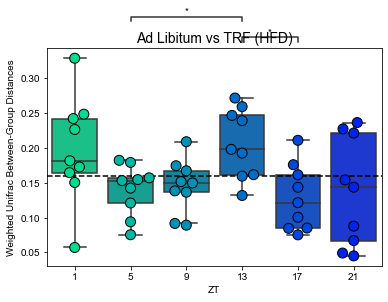

In [117]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="winter_r",
                 data=wufdm4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="ZT", y="wUF_distance", palette="winter_r", edgecolor='k', linewidth=1, size=10,
                   data=wufdm4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Ad Libitum vs TRF (HFD)', fontsize=14)
ax.axhline(0.1590485541350499, color='k', ls='--')

ax, test_results = add_stat_annotation(ax, data = wufdm4, x="ZT", y="wUF_distance", 
                                       order = ['1', '5', '9', '13', '17', '21'], 
                                       box_pairs = [('13', '5'), ('13', '17')],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_FAvFT_wUF_cecum_boxplot.svg', dpi=300, bbox_inches="tight")

### All ad lib, diet comparison

In [118]:
diet5_TRF_wUF_dm = named4_TRF_wUF_dm.filter(regex='NA')
diet6_TRF_wUF_dm = diet5_TRF_wUF_dm.T.filter(regex='FA')
diet6_TRF_wUF_dm.shape

(18, 18)

In [119]:
diet6_TRF_wUF_dm

group_time,FA_13,FA_13,FA_13,FA_17,FA_17,FA_17,FA_21,FA_21,FA_21,FA_1,FA_1,FA_1,FA_5,FA_5,FA_5,FA_9,FA_9,FA_9
NA_13,0.502773,0.452767,0.458098,0.512219,0.501936,0.493288,0.526337,0.439337,0.527023,0.505214,0.466816,0.457947,0.434470,0.495782,0.416485,0.509276,0.481815,0.453968
NA_13,0.418644,0.366626,0.357761,0.420156,0.405694,0.407288,0.434145,0.355060,0.435266,0.408860,0.397977,0.382899,0.359086,0.408311,0.345332,0.423974,0.392752,0.371765
NA_13,0.481917,0.406985,0.485479,0.580237,0.577431,0.548353,0.590868,0.504844,0.585594,0.580876,0.422697,0.459949,0.487659,0.561992,0.467769,0.560646,0.536407,0.486336
NA_17,0.274415,0.331915,0.328735,0.427010,0.412082,0.432840,0.430563,0.410700,0.440205,0.413146,0.383706,0.363620,0.383366,0.409106,0.398977,0.438830,0.398632,0.354848
NA_17,0.532936,0.597861,0.591925,0.689856,0.668974,0.692889,0.691424,0.668521,0.698154,0.670535,0.622651,0.610870,0.631344,0.659644,0.637899,0.680114,0.651727,0.605458
NA_17,0.418715,0.481933,0.481259,0.580892,0.567011,0.576498,0.583380,0.558439,0.587960,0.567387,0.512210,0.500787,0.520681,0.553336,0.538505,0.575454,0.545591,0.497387
NA_21,0.285833,0.282471,0.206997,0.239071,0.223438,0.247007,0.241859,0.252118,0.250596,0.227035,0.376567,0.315605,0.261334,0.227617,0.263743,0.253294,0.230883,0.271605
NA_21,0.307117,0.294484,0.224878,0.275062,0.255513,0.283466,0.278949,0.283261,0.287953,0.262619,0.387064,0.326521,0.279598,0.263220,0.281407,0.284588,0.259035,0.282864
NA_21,0.576743,0.633880,0.659207,0.750034,0.749778,0.731714,0.760155,0.716057,0.756544,0.751577,0.662591,0.653155,0.679971,0.728812,0.686574,0.727629,0.707674,0.653194
NA_1,0.421481,0.485245,0.493283,0.584744,0.575234,0.582669,0.588989,0.563424,0.590161,0.580938,0.516783,0.506994,0.531557,0.562714,0.535492,0.574414,0.546856,0.503670


In [120]:
wufdmd = diet6_TRF_wUF_dm.copy()
wufdmd2 = wufdmd.stack().reset_index()
wufdmd2.columns = ['NCD_adlib','HFD_adlib','wUF_distance']
wufdmd2

,NCD_adlib,HFD_adlib,wUF_distance
0,NA_13,FA_13,0.502773
1,NA_13,FA_13,0.452767
2,NA_13,FA_13,0.458098
3,NA_13,FA_17,0.512219
4,NA_13,FA_17,0.501936
...,...,...,...
319,NA_9,FA_5,0.927620
320,NA_9,FA_5,0.827452
321,NA_9,FA_9,0.923940
322,NA_9,FA_9,0.902431


In [121]:
wufdmd2['timepoints'] = wufdmd2['NCD_adlib'].str.split('_').str[1] + "_" + wufdmd2['HFD_adlib'].str.split('_').str[1]
wufdmd2.timepoints.unique()

array(['13_13', '13_17', '13_21', '13_1', '13_5', '13_9', '17_13',
       '17_17', '17_21', '17_1', '17_5', '17_9', '21_13', '21_17',
       '21_21', '21_1', '21_5', '21_9', '1_13', '1_17', '1_21', '1_1',
       '1_5', '1_9', '5_13', '5_17', '5_21', '5_1', '5_5', '5_9', '9_13',
       '9_17', '9_21', '9_1', '9_5', '9_9'], dtype=object)

In [122]:
zt_tps2 = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

In [123]:
wufdmd3 = wufdmd2.loc[wufdmd2['timepoints'].isin(zt_tps2)]
wufdmd3.head()

,NCD_adlib,HFD_adlib,wUF_distance,timepoints
0,NA_13,FA_13,0.502773,13_13
1,NA_13,FA_13,0.452767,13_13
2,NA_13,FA_13,0.458098,13_13
18,NA_13,FA_13,0.418644,13_13
19,NA_13,FA_13,0.366626,13_13


In [124]:
wufdmd4 = wufdmd3.copy()
wufdmd4['ZT'] = wufdmd4['timepoints'].str.split('_').str[-1]
wufdmd4['Controls'] = wufdmd4['NCD_adlib'].str.split('_').str[0]
wufdmd4['Experimentals'] = wufdmd4['HFD_adlib'].str.split('_').str[0]
wufdmd4.head()

,NCD_adlib,HFD_adlib,wUF_distance,timepoints,ZT,Controls,Experimentals
0,NA_13,FA_13,0.502773,13_13,13,NA,FA
1,NA_13,FA_13,0.452767,13_13,13,NA,FA
2,NA_13,FA_13,0.458098,13_13,13,NA,FA
18,NA_13,FA_13,0.418644,13_13,13,NA,FA
19,NA_13,FA_13,0.366626,13_13,13,NA,FA


In [125]:
wufdmd4.wUF_distance.mean()

0.6112440759235392

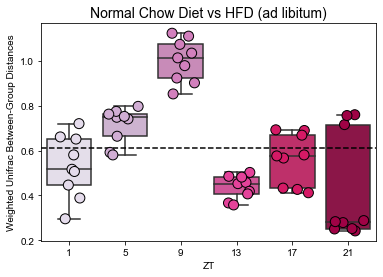

In [126]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="PuRd",
                 data=wufdmd4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.stripplot(x="ZT", y="wUF_distance", palette="PuRd", edgecolor='k', linewidth=1, size=10, jitter=0.3,
                   data=wufdmd4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Normal Chow Diet vs HFD (ad libitum)', fontsize=14)
ax.axhline(0.6112440759235392, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvFA_wUF_cecum_boxplot.svg', dpi=300, bbox_inches="tight")

In [127]:
for key in list(combinations(wufdmd4.ZT.unique(), 2)):
    x = wufdmd4[wufdmd4["ZT"] == key[0]].wUF_distance.values
    y = wufdmd4[wufdmd4["ZT"] == key[1]].wUF_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        t = set(wufdmd4[wufdmd4["ZT"] == key[0]].mice)
        w = set(wufdmd4[wufdmd4["ZT"] == key[1]].mice)
        q = list(t.intersection(w))
        
        newdf = wufdmd4.loc[wufdmd4['mice'].isin(q)]
        
        xx = newdf[newdf["ZT"] == key[0]].wUF_distance.values
        yy = newdf[newdf["ZT"] == key[1]].wUF_distance.values
        
        w, p = wilcoxon(xx, yy)
        print("Combination", key)
        print(p, w)
        print("____________________")
#significant combinations 

Combination ('13', '17')
0.0546875 6.0
____________________
Combination ('13', '21')
0.91015625 21.0
____________________
Combination ('13', '1')
0.203125 11.0
____________________
Combination ('13', '5')
0.00390625 0.0
____________________
Combination ('13', '9')
0.00390625 0.0
____________________
Combination ('17', '21')
0.09765625 8.0
____________________
Combination ('17', '1')
0.65234375 18.0
____________________
Combination ('17', '5')
0.00390625 0.0
____________________
Combination ('17', '9')
0.00390625 0.0
____________________
Combination ('21', '1')
0.65234375 18.0
____________________
Combination ('21', '5')
0.0546875 6.0
____________________
Combination ('21', '9')
0.00390625 0.0
____________________
Combination ('1', '5')
0.00390625 0.0
____________________
Combination ('1', '9')
0.00390625 0.0
____________________
Combination ('5', '9')
0.00390625 0.0
____________________


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

9 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=8.100e+01
1 v.s. 5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.775e-02 U_stat=8.000e+00
5 v.s. 9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=0.000e+00
5 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=8.100e+01
9 v.s. 17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=8.100e+01
1 v.s. 9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=0.000e+00
5 v.s. 17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.955e-02 U_stat=7.200e+01
9 v.s. 21: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, 

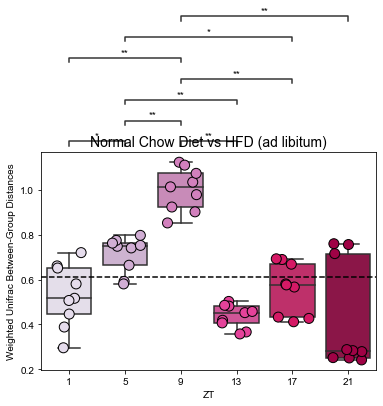

In [128]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="PuRd",
                 data=wufdmd4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.stripplot(x="ZT", y="wUF_distance", palette="PuRd", edgecolor='k', linewidth=1, size=10, jitter=0.3,
                   data=wufdmd4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Normal Chow Diet vs HFD (ad libitum)', fontsize=14)
ax.axhline(0.6112440759235392, color='k', ls='--')

ax, test_results = add_stat_annotation(ax, data = wufdmd4, x="ZT", y="wUF_distance", 
                                       order = ['1', '5', '9', '13', '17', '21'], 
                                       box_pairs = [('13', '5'), ('13', '9'), 
                                                   ('17', '5'), ('17', '9'), 
                                                   ('21', '9'), ('1', '5'), 
                                                   ('1', '9'), ('5', '9')],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvsFA_wUF_cecum_dist_boxplot.svg', dpi=300, bbox_inches="tight")

### NA vs FT - farthest apart comparison

In [129]:
far_TRF_wUF_dm = named4_TRF_wUF_dm.filter(regex='NA')
far2_TRF_wUF_dm = far_TRF_wUF_dm.T.filter(regex='FT')
far2_TRF_wUF_dm.shape

(18, 18)

In [130]:
far2_TRF_wUF_dm

group_time,FT_13,FT_13,FT_13,FT_17,FT_17,FT_17,FT_21,FT_21,FT_21,FT_1,FT_1,FT_1,FT_5,FT_5,FT_5,FT_9,FT_9,FT_9
NA_13,0.497326,0.487830,0.525339,0.508929,0.504454,0.459576,0.504084,0.464663,0.522795,0.490577,0.444928,0.434316,0.497802,0.501693,0.483443,0.450471,0.426476,0.453294
NA_13,0.359754,0.391711,0.435969,0.395516,0.404032,0.327816,0.404621,0.319030,0.432034,0.400444,0.369428,0.359444,0.378614,0.411995,0.388126,0.373829,0.342623,0.365422
NA_13,0.580851,0.560025,0.576017,0.588933,0.581526,0.542517,0.578912,0.542461,0.583098,0.563966,0.445502,0.479144,0.573217,0.565773,0.552774,0.467300,0.498868,0.509138
NA_17,0.400828,0.411261,0.444856,0.401250,0.406204,0.362737,0.402633,0.392389,0.431840,0.407993,0.373715,0.391538,0.387263,0.412516,0.402723,0.408060,0.387923,0.381611
NA_17,0.650764,0.664046,0.697110,0.651259,0.662777,0.620595,0.668646,0.626953,0.695886,0.665630,0.627513,0.650811,0.640365,0.665596,0.665950,0.652096,0.611118,0.631181
NA_17,0.564228,0.556580,0.583697,0.560333,0.559112,0.528780,0.559437,0.549327,0.581702,0.559731,0.518323,0.536237,0.549817,0.556236,0.555154,0.548038,0.527900,0.524609
NA_21,0.201266,0.222624,0.254500,0.206701,0.210974,0.146383,0.210448,0.201576,0.241474,0.220209,0.303213,0.241127,0.191036,0.217186,0.218210,0.285247,0.253237,0.231462
NA_21,0.219158,0.256063,0.289777,0.241121,0.247744,0.179900,0.248918,0.206757,0.279331,0.255935,0.314245,0.270872,0.222732,0.254187,0.252241,0.302454,0.266942,0.243211
NA_21,0.752957,0.739486,0.749000,0.757394,0.751769,0.724685,0.753553,0.716364,0.756560,0.738974,0.676337,0.693756,0.743778,0.732224,0.723804,0.691447,0.681681,0.685882
NA_1,0.576758,0.573841,0.587164,0.580160,0.578770,0.554407,0.574403,0.546320,0.584273,0.569276,0.522930,0.537931,0.567430,0.562277,0.565157,0.541880,0.498767,0.526348


In [131]:
wufdmf = far2_TRF_wUF_dm.copy()
wufdmf2 = wufdmf.stack().reset_index()
wufdmf2.columns = ['NCD_adlib','HFD_TRF','wUF_distance']
wufdmf2

,NCD_adlib,HFD_TRF,wUF_distance
0,NA_13,FT_13,0.497326
1,NA_13,FT_13,0.487830
2,NA_13,FT_13,0.525339
3,NA_13,FT_17,0.508929
4,NA_13,FT_17,0.504454
...,...,...,...
319,NA_9,FT_5,0.930318
320,NA_9,FT_5,0.920987
321,NA_9,FT_9,0.815935
322,NA_9,FT_9,0.908105


In [132]:
wufdmf2['timepoints'] = wufdmf2['NCD_adlib'].str.split('_').str[1] + "_" + wufdmf2['HFD_TRF'].str.split('_').str[1]
wufdmf2.timepoints.unique()

array(['13_13', '13_17', '13_21', '13_1', '13_5', '13_9', '17_13',
       '17_17', '17_21', '17_1', '17_5', '17_9', '21_13', '21_17',
       '21_21', '21_1', '21_5', '21_9', '1_13', '1_17', '1_21', '1_1',
       '1_5', '1_9', '5_13', '5_17', '5_21', '5_1', '5_5', '5_9', '9_13',
       '9_17', '9_21', '9_1', '9_5', '9_9'], dtype=object)

In [133]:
zt_tps2 = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

In [134]:
wufdmf3 = wufdmf2.loc[wufdmd2['timepoints'].isin(zt_tps2)]
wufdmf3.head()

,NCD_adlib,HFD_TRF,wUF_distance,timepoints
0,NA_13,FT_13,0.497326,13_13
1,NA_13,FT_13,0.487830,13_13
2,NA_13,FT_13,0.525339,13_13
18,NA_13,FT_13,0.359754,13_13
19,NA_13,FT_13,0.391711,13_13


In [135]:
wufdmf4 = wufdmf3.copy()
wufdmf4['ZT'] = wufdmf4['timepoints'].str.split('_').str[-1]
wufdmf4['Controls'] = wufdmf4['NCD_adlib'].str.split('_').str[0]
wufdmf4['Experimentals'] = wufdmf4['HFD_TRF'].str.split('_').str[0]
wufdmf4.head()

,NCD_adlib,HFD_TRF,wUF_distance,timepoints,ZT,Controls,Experimentals
0,NA_13,FT_13,0.497326,13_13,13,NA,FT
1,NA_13,FT_13,0.487830,13_13,13,NA,FT
2,NA_13,FT_13,0.525339,13_13,13,NA,FT
18,NA_13,FT_13,0.359754,13_13,13,NA,FT
19,NA_13,FT_13,0.391711,13_13,13,NA,FT


In [136]:
wufdmf4.wUF_distance.mean()

0.6083018785168692

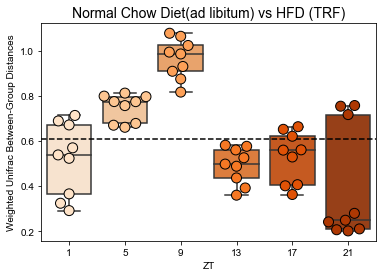

In [137]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="Oranges",
                 data=wufdmf4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="ZT", y="wUF_distance", palette="Oranges", edgecolor='k', linewidth=1, size=10,
                   data=wufdmf4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Normal Chow Diet(ad libitum) vs HFD (TRF)', fontsize=14)
ax.axhline(0.6083018785168692, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvFT_wUF_cecum_boxplot.svg', dpi=300, bbox_inches="tight")

In [138]:
for key in list(combinations(wufdmf4.ZT.unique(), 2)):
    x = wufdmf4[wufdmf4["ZT"] == key[0]].wUF_distance.values
    y = wufdmf4[wufdmf4["ZT"] == key[1]].wUF_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        t = set(wufdmf4[wufdmf4["ZT"] == key[0]].mice)
        w = set(wufdmf4[wufdmf4["ZT"] == key[1]].mice)
        q = list(t.intersection(w))
        
        newdf = wufdmf4.loc[wufdmf4['mice'].isin(q)]
        
        xx = newdf[newdf["ZT"] == key[0]].wUF_distance.values
        yy = newdf[newdf["ZT"] == key[1]].wUF_distance.values
        
        w, p = wilcoxon(xx, yy)
        print("Combination", key)
        print(p, w)
        print("____________________")
#significant combinations 

Combination ('13', '17')
0.91015625 21.0
____________________
Combination ('13', '21')
0.203125 11.0
____________________
Combination ('13', '1')
0.5703125 17.0
____________________
Combination ('13', '5')
0.00390625 0.0
____________________
Combination ('13', '9')
0.00390625 0.0
____________________
Combination ('17', '21')
0.25 12.0
____________________
Combination ('17', '1')
0.91015625 21.0
____________________
Combination ('17', '5')
0.00390625 0.0
____________________
Combination ('17', '9')
0.00390625 0.0
____________________
Combination ('21', '1')
0.49609375 16.0
____________________
Combination ('21', '5')
0.0546875 6.0
____________________
Combination ('21', '9')
0.00390625 0.0
____________________
Combination ('1', '5')
0.00390625 0.0
____________________
Combination ('1', '9')
0.00390625 0.0
____________________
Combination ('5', '9')
0.00390625 0.0
____________________


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

9 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=8.100e+01
1 v.s. 5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.775e-02 U_stat=8.000e+00
5 v.s. 9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=0.000e+00
5 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=8.100e+01
9 v.s. 17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=8.100e+01
1 v.s. 9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.298e-03 U_stat=0.000e+00
5 v.s. 17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.589e-03 U_stat=8.000e+01
9 v.s. 21: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, 

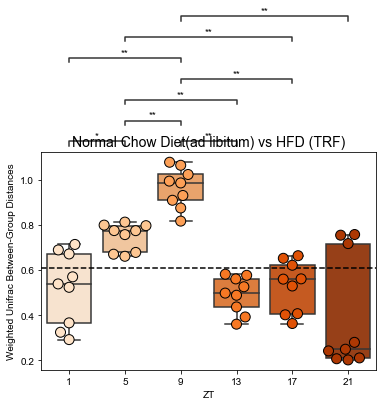

In [139]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="Oranges",
                 data=wufdmf4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="ZT", y="wUF_distance", palette="Oranges", edgecolor='k', linewidth=1, size=10,
                   data=wufdmf4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Normal Chow Diet(ad libitum) vs HFD (TRF)', fontsize=14)
ax.axhline(0.6083018785168692, color='k', ls='--')

ax, test_results = add_stat_annotation(ax, data = wufdmf4, x="ZT", y="wUF_distance", 
                                       order = ['1', '5', '9', '13', '17', '21'], 
                                       box_pairs = [('13', '5'), ('13', '9'), ('17', '5'), ('17', '9'), 
                                                   ('21', '9'), ('1', '5'), ('1', '9'), ('5', '9')],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvFT_wUF_cecum_boxplot.svg', dpi=300, bbox_inches="tight")

## two together

In [140]:
wufdmd2['exp'] = 'NA_v_FA'
wufdmf2['exp'] = 'NA_v_FT'

In [141]:
twotoget = pd.concat([wufdmd2, wufdmf2], sort=True)
twotoget

,HFD_TRF,HFD_adlib,NCD_adlib,exp,timepoints,wUF_distance
0,NaN,FA_13,NA_13,NA_v_FA,13_13,0.502773
1,NaN,FA_13,NA_13,NA_v_FA,13_13,0.452767
2,NaN,FA_13,NA_13,NA_v_FA,13_13,0.458098
3,NaN,FA_17,NA_13,NA_v_FA,13_17,0.512219
4,NaN,FA_17,NA_13,NA_v_FA,13_17,0.501936
...,...,...,...,...,...,...
319,FT_5,NaN,NA_9,NA_v_FT,9_5,0.930318
320,FT_5,NaN,NA_9,NA_v_FT,9_5,0.920987
321,FT_9,NaN,NA_9,NA_v_FT,9_9,0.815935
322,FT_9,NaN,NA_9,NA_v_FT,9_9,0.908105


In [142]:
twotoget.wUF_distance.values.mean()

0.6089892675268334

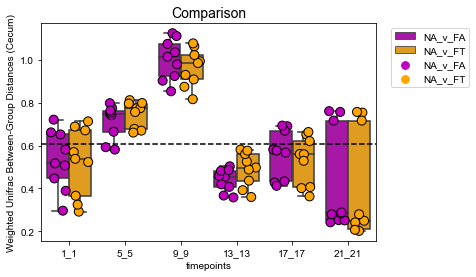

In [143]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'],
                 data=twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'], 
                   edgecolor='k', linewidth=1, size=9, dodge=True, jitter=0.3,
                   data=twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.ylabel('Weighted Unifrac Between-Group Distances (Cecum)')
plt.title('Comparison', fontsize=14)
ax.axhline(0.6089892675268334, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_two_wUF_cecum_boxplot.svg', dpi=300, bbox_inches="tight")

In [144]:
tpz = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

x = twotoget[twotoget["exp"] == "NA_v_FA"]
y = twotoget[twotoget["exp"] == "NA_v_FT"]
for key in tpz:
    w = x[x["timepoints"] == key].wUF_distance.values
    z = y[y["timepoints"] == key].wUF_distance.values
    if len(w) == len(z):
        st, p = wilcoxon(w, z)
        print("ZT", key)
        print(p, st)
        print("____________________")
    else:
        print("not even", key)

ZT 1_1
0.734375 19.0
____________________
ZT 5_5
0.01171875 2.0
____________________
ZT 9_9
0.203125 11.0
____________________
ZT 13_13
0.0390625 5.0
____________________
ZT 17_17
0.00390625 0.0
____________________
ZT 21_21
0.01953125 3.0
____________________


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

5_5_NA_v_FA v.s. 5_5_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.700e+01
1_1_NA_v_FA v.s. 1_1_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.000e+01
9_9_NA_v_FA v.s. 9_9_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.900e+01
13_13_NA_v_FA v.s. 13_13_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.718e-01 U_stat=2.200e+01
17_17_NA_v_FA v.s. 17_17_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.400e+01
21_21_NA_v_FA v.s. 21_21_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.400e+01


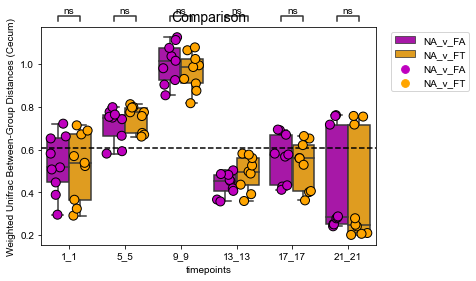

In [145]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'],
                 data=twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'], 
                   edgecolor='k', linewidth=1, size=9, dodge=True, jitter=0.3,
                   data=twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.ylabel('Weighted Unifrac Between-Group Distances (Cecum)')
plt.title('Comparison', fontsize=14)
ax.axhline(0.6089892675268334, color='k', ls='--')

box_pairz = [((tp, 'NA_v_FA'), (tp, 'NA_v_FT')) for tp in tpz]
ax, test_results = add_stat_annotation(ax, data = twotoget, x="timepoints", y="wUF_distance", hue='exp',
                                       order = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'], 
                                       box_pairs = box_pairz,
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/newTRF_cecum_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

# Ileum

In [146]:
TRF_metadata.head()

,#SampleID,group_time
0,FA1a,FA_13
1,FA1b,FA_13
2,FA1c,FA_13
3,FA2a,FA_17
4,FA2b,FA_17


In [147]:
iTRF_metadata = TRF_metadata.copy()

In [148]:
iTRF_metadata['#SampleID'] = 'i' + iTRF_metadata['#SampleID'].astype(str)
iTRF_metadata.head()

,#SampleID,group_time
0,iFA1a,FA_13
1,iFA1b,FA_13
2,iFA1c,FA_13
3,iFA2a,FA_17
4,iFA2b,FA_17


In [149]:
iTRF_metadata.set_index('#SampleID', inplace=True)

In [150]:
iTRF_metadata.tail()

,group_time
#SampleID,
iNT5b,NT_5
iNT5c,NT_5
iNT6a,NT_9
iNT6b,NT_9
iNT6c,NT_9


In [151]:
TRF_ileum_wUF_dm = pd.read_csv('../data/TRF/ileum_weighted_unifrac_dm.tsv', sep='\t', index_col=0)
TRF_ileum_wUF_dm.head()

,iFA1a,iFA1b,iFA1c,iFA2a,iFA2b,iFA2c,iFA3a,iFA3b,iFA3c,iFA4a,...,iNT3c,iNT4a,iNT4b,iNT4c,iNT5a,iNT5b,iNT5c,iNT6a,iNT6b,iNT6c
iFA1a,0.000000,0.328387,0.260457,0.082488,0.250212,0.104742,0.132533,0.137726,0.094950,0.086423,...,0.445151,0.427237,0.372746,0.322003,0.490093,0.661452,0.394204,0.625417,0.643627,0.595846
iFA1b,0.328387,0.000000,0.113211,0.370904,0.480453,0.345363,0.317015,0.307797,0.375688,0.315004,...,0.609082,0.712258,0.619839,0.600822,0.514114,0.819126,0.406771,0.803996,0.827460,0.749787
iFA1c,0.260457,0.113211,0.000000,0.301145,0.410243,0.265874,0.233916,0.223828,0.306251,0.246179,...,0.529360,0.652013,0.565967,0.542955,0.468464,0.767911,0.409588,0.755889,0.777694,0.702301
iFA2a,0.082488,0.370904,0.301145,0.000000,0.235533,0.084630,0.145424,0.179728,0.049214,0.074932,...,0.467197,0.442350,0.393112,0.300906,0.526183,0.677250,0.407550,0.657414,0.660531,0.627982
iFA2b,0.250212,0.480453,0.410243,0.235533,0.000000,0.194007,0.281669,0.305730,0.240748,0.243567,...,0.512792,0.488509,0.473625,0.363895,0.653927,0.742685,0.532958,0.692136,0.687582,0.673516


In [152]:
named_TRF_ileum_wUF_dm = pd.merge(iTRF_metadata, TRF_ileum_wUF_dm, left_index=True, right_index=True)
named_TRF_ileum_wUF_dm.head()

,group_time,iFA1a,iFA1b,iFA1c,iFA2a,iFA2b,iFA2c,iFA3a,iFA3b,iFA3c,...,iNT3c,iNT4a,iNT4b,iNT4c,iNT5a,iNT5b,iNT5c,iNT6a,iNT6b,iNT6c
#SampleID,,,,,,,,,,,,,,,,,,,,,
iFA1a,FA_13,0.000000,0.328387,0.260457,0.082488,0.250212,0.104742,0.132533,0.137726,0.094950,...,0.445151,0.427237,0.372746,0.322003,0.490093,0.661452,0.394204,0.625417,0.643627,0.595846
iFA1b,FA_13,0.328387,0.000000,0.113211,0.370904,0.480453,0.345363,0.317015,0.307797,0.375688,...,0.609082,0.712258,0.619839,0.600822,0.514114,0.819126,0.406771,0.803996,0.827460,0.749787
iFA1c,FA_13,0.260457,0.113211,0.000000,0.301145,0.410243,0.265874,0.233916,0.223828,0.306251,...,0.529360,0.652013,0.565967,0.542955,0.468464,0.767911,0.409588,0.755889,0.777694,0.702301
iFA2a,FA_17,0.082488,0.370904,0.301145,0.000000,0.235533,0.084630,0.145424,0.179728,0.049214,...,0.467197,0.442350,0.393112,0.300906,0.526183,0.677250,0.407550,0.657414,0.660531,0.627982
iFA2b,FA_17,0.250212,0.480453,0.410243,0.235533,0.000000,0.194007,0.281669,0.305730,0.240748,...,0.512792,0.488509,0.473625,0.363895,0.653927,0.742685,0.532958,0.692136,0.687582,0.673516


In [153]:
named2_TRF_ileum_wUF_dm = named_TRF_ileum_wUF_dm.set_index('group_time')

In [154]:
Named_TRF_ileum_wUF_dm = named_TRF_ileum_wUF_dm[['group_time']].copy()
Named_TRF_ileum_wUF_dm.head()

,group_time
#SampleID,
iFA1a,FA_13
iFA1b,FA_13
iFA1c,FA_13
iFA2a,FA_17
iFA2b,FA_17


In [155]:
named3_TRF_ileum_wUF_dm = pd.merge(named2_TRF_ileum_wUF_dm.T, Named_TRF_ileum_wUF_dm, left_index=True, right_index=True)
named4_TRF_ileum_wUF_dm = named3_TRF_ileum_wUF_dm.set_index('group_time')
named4_TRF_ileum_wUF_dm.head()

,FA_13,FA_13,FA_13,FA_17,FA_17,FA_17,FA_21,FA_21,FA_21,FA_1,...,NT_21,NT_1,NT_1,NT_1,NT_5,NT_5,NT_5,NT_9,NT_9,NT_9
group_time,,,,,,,,,,,,,,,,,,,,,
FA_13,0.000000,0.328387,0.260457,0.082488,0.250212,0.104742,0.132533,0.137726,0.094950,0.086423,...,0.445151,0.427237,0.372746,0.322003,0.490093,0.661452,0.394204,0.625417,0.643627,0.595846
FA_13,0.328387,0.000000,0.113211,0.370904,0.480453,0.345363,0.317015,0.307797,0.375688,0.315004,...,0.609082,0.712258,0.619839,0.600822,0.514114,0.819126,0.406771,0.803996,0.827460,0.749787
FA_13,0.260457,0.113211,0.000000,0.301145,0.410243,0.265874,0.233916,0.223828,0.306251,0.246179,...,0.529360,0.652013,0.565967,0.542955,0.468464,0.767911,0.409588,0.755889,0.777694,0.702301
FA_17,0.082488,0.370904,0.301145,0.000000,0.235533,0.084630,0.145424,0.179728,0.049214,0.074932,...,0.467197,0.442350,0.393112,0.300906,0.526183,0.677250,0.407550,0.657414,0.660531,0.627982
FA_17,0.250212,0.480453,0.410243,0.235533,0.000000,0.194007,0.281669,0.305730,0.240748,0.243567,...,0.512792,0.488509,0.473625,0.363895,0.653927,0.742685,0.532958,0.692136,0.687582,0.673516


In [156]:
named5_TRF_ileum_wUF_dm = named4_TRF_ileum_wUF_dm.filter(regex='FA')
named6_TRF_ileum_wUF_dm = named5_TRF_ileum_wUF_dm.T.filter(regex='FT')
named6_TRF_ileum_wUF_dm.shape

(18, 18)

In [157]:
trf_ileum_wufdm = named6_TRF_ileum_wUF_dm.copy()
trf_ileum_wufdm2 = trf_ileum_wufdm.stack().reset_index()
trf_ileum_wufdm2.columns = ['HFD_adlib','HFD_TRF','wUF_distance']
trf_ileum_wufdm2

,HFD_adlib,HFD_TRF,wUF_distance
0,FA_13,FT_13,0.300595
1,FA_13,FT_13,0.269985
2,FA_13,FT_13,0.259452
3,FA_13,FT_17,0.300966
4,FA_13,FT_17,0.281375
...,...,...,...
319,FA_9,FT_5,0.076784
320,FA_9,FT_5,0.175571
321,FA_9,FT_9,0.084802
322,FA_9,FT_9,0.067417


In [158]:
trf_ileum_wufdm2['timepoints'] = trf_ileum_wufdm2['HFD_adlib'].str.split('_').str[-1] + "_" + trf_ileum_wufdm2['HFD_TRF'].str.split('_').str[-1]
trf_ileum_wufdm2.timepoints.unique()

array(['13_13', '13_17', '13_21', '13_1', '13_5', '13_9', '17_13',
       '17_17', '17_21', '17_1', '17_5', '17_9', '21_13', '21_17',
       '21_21', '21_1', '21_5', '21_9', '1_13', '1_17', '1_21', '1_1',
       '1_5', '1_9', '5_13', '5_17', '5_21', '5_1', '5_5', '5_9', '9_13',
       '9_17', '9_21', '9_1', '9_5', '9_9'], dtype=object)

In [159]:
trf_ileum_wufdm2["FA_timepoint"] = trf_ileum_wufdm2.HFD_adlib.str.split('_').str[-1]
trf_ileum_wufdm2["FT_timepoint"] = trf_ileum_wufdm2.HFD_TRF.str.split('_').str[-1]
trf_ileum_wufdm3 = trf_ileum_wufdm2[trf_ileum_wufdm2.FA_timepoint == trf_ileum_wufdm2.FT_timepoint].copy()
trf_ileum_wufdm3.head()

,HFD_adlib,HFD_TRF,wUF_distance,timepoints,FA_timepoint,FT_timepoint
0,FA_13,FT_13,0.300595,13_13,13,13
1,FA_13,FT_13,0.269985,13_13,13,13
2,FA_13,FT_13,0.259452,13_13,13,13
18,FA_13,FT_13,0.484633,13_13,13,13
19,FA_13,FT_13,0.453756,13_13,13,13


In [160]:
trf_ileum_wufdm3.wUF_distance.mean()

0.20991776320896444

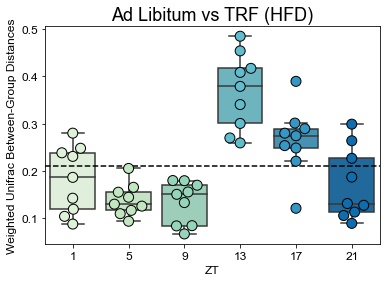

In [161]:
ax = sns.boxplot(x="FA_timepoint", y="wUF_distance", palette="GnBu",
                 data=trf_ileum_wufdm3, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="FA_timepoint", y="wUF_distance", palette="GnBu", edgecolor='k', linewidth=1, size=10,
                   data=trf_ileum_wufdm3, order=['1', '5', '9', '13', '17', '21'])
    
plt.ylabel('Weighted Unifrac Between-Group Distances', size=12)
plt.title('Ad Libitum vs TRF (HFD)', size=18)
plt.xlabel('ZT', size=12)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(0.20991776320896444, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_FAvFT_wUF_ileum_boxplot.svg', dpi=300, bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

9 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.474e-03 U_stat=0.000e+00
5 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.474e-03 U_stat=0.000e+00
13 v.s. 21: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.517e-03 U_stat=7.800e+01
9 v.s. 17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.608e-02 U_stat=6.000e+00
1 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.754e-03 U_stat=2.000e+00
5 v.s. 17: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.608e-02 U_stat=6.000e+00


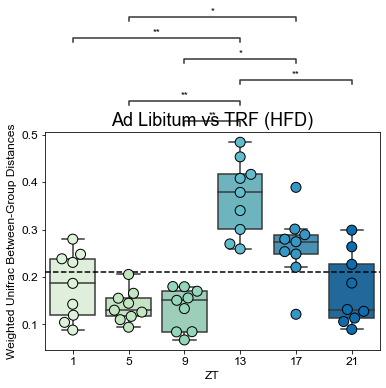

In [162]:
ax = sns.boxplot(x="FA_timepoint", y="wUF_distance", palette="GnBu",
                 data=trf_ileum_wufdm3, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="FA_timepoint", y="wUF_distance", palette="GnBu", edgecolor='k', linewidth=1, size=10,
                   data=trf_ileum_wufdm3, order=['1', '5', '9', '13', '17', '21'])
    
plt.ylabel('Weighted Unifrac Between-Group Distances', size=12)
plt.title('Ad Libitum vs TRF (HFD)', size=18)
plt.xlabel('ZT', size=12)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(0.20991776320896444, color='k', ls='--')

ax, test_results = add_stat_annotation(ax, data = trf_ileum_wufdm3, x="FA_timepoint", y="wUF_distance",
                                       order = ['1', '5', '9', '13', '17', '21'], 
                                       box_pairs = [('13', '1'), ('13', '5'), ('13', '9'), ('13', '21'), 
                                                   ('17', '5'), ('17', '9')],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_FAvFT_wUF_ileum_boxplot.svg', dpi=300, bbox_inches="tight")

### all fed ad lib, compare diets

In [163]:
adlib5_TRF_ileum_wUF_dm = named4_TRF_ileum_wUF_dm.filter(regex='NA')
adlib6_TRF_ileum_wUF_dm = adlib5_TRF_ileum_wUF_dm.T.filter(regex='FA')
adlib6_TRF_ileum_wUF_dm.shape

(18, 18)

In [164]:
trf_ileum_wufdmd = adlib6_TRF_ileum_wUF_dm.copy()
trf_ileum_wufdmd2 = trf_ileum_wufdmd.stack().reset_index()
trf_ileum_wufdmd2.columns = ['NCD_adlib','HFD_adlib','wUF_distance']
trf_ileum_wufdmd2

,NCD_adlib,HFD_adlib,wUF_distance
0,NA_13,FA_13,0.138072
1,NA_13,FA_13,0.381779
2,NA_13,FA_13,0.321732
3,NA_13,FA_17,0.114254
4,NA_13,FA_17,0.275614
...,...,...,...
319,NA_9,FA_5,0.554342
320,NA_9,FA_5,0.608940
321,NA_9,FA_9,0.631298
322,NA_9,FA_9,0.594062


In [165]:
trf_ileum_wufdmd2['timepoints'] = trf_ileum_wufdmd2['NCD_adlib'].str.split('_').str[-1] + "_" + trf_ileum_wufdmd2['HFD_adlib'].str.split('_').str[-1]
trf_ileum_wufdmd2.timepoints.unique()

array(['13_13', '13_17', '13_21', '13_1', '13_5', '13_9', '17_13',
       '17_17', '17_21', '17_1', '17_5', '17_9', '21_13', '21_17',
       '21_21', '21_1', '21_5', '21_9', '1_13', '1_17', '1_21', '1_1',
       '1_5', '1_9', '5_13', '5_17', '5_21', '5_1', '5_5', '5_9', '9_13',
       '9_17', '9_21', '9_1', '9_5', '9_9'], dtype=object)

In [166]:
trf_ileum_wufdmd2["NA_timepoint"] = trf_ileum_wufdmd2.NCD_adlib.str.split('_').str[-1]
trf_ileum_wufdmd2["FA_timepoint"] = trf_ileum_wufdmd2.HFD_adlib.str.split('_').str[-1]
trf_ileum_wufdmd3 = trf_ileum_wufdmd2[trf_ileum_wufdmd2.NA_timepoint == trf_ileum_wufdmd2.FA_timepoint].copy()
trf_ileum_wufdmd3.head()

,NCD_adlib,HFD_adlib,wUF_distance,timepoints,NA_timepoint,FA_timepoint
0,NA_13,FA_13,0.138072,13_13,13,13
1,NA_13,FA_13,0.381779,13_13,13,13
2,NA_13,FA_13,0.321732,13_13,13,13
18,NA_13,FA_13,0.296888,13_13,13,13
19,NA_13,FA_13,0.487178,13_13,13,13


In [167]:
trf_ileum_wufdmd3.wUF_distance.mean()

0.37179434960959457

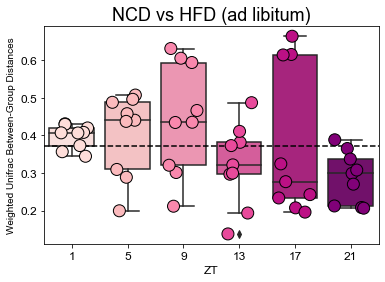

In [168]:
ax = sns.boxplot(x="FA_timepoint", y="wUF_distance", palette="RdPu",
                 data=trf_ileum_wufdmd3, order=['1', '5', '9', '13', '17', '21'])
ax = sns.stripplot(x="FA_timepoint", y="wUF_distance", palette="RdPu", edgecolor='k', linewidth=1, size=12,
                   data=trf_ileum_wufdmd3, order=['1', '5', '9', '13', '17', '21'], jitter=0.3)
    
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('NCD vs HFD (ad libitum)', size=18)
plt.xlabel('ZT', size=12)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(0.37179434960959457, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvFA_wUF_ileum_boxplot.svg', dpi=300, bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 21: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.998e-03 U_stat=7.600e+01


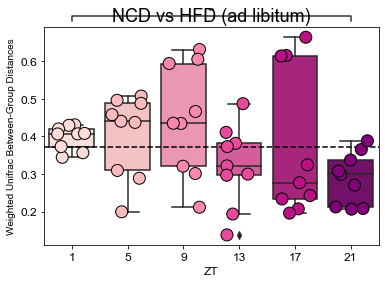

In [169]:
ax = sns.boxplot(x="FA_timepoint", y="wUF_distance", palette="RdPu",
                 data=trf_ileum_wufdmd3, order=['1', '5', '9', '13', '17', '21'])
ax = sns.stripplot(x="FA_timepoint", y="wUF_distance", palette="RdPu", edgecolor='k', linewidth=1, size=12,
                   data=trf_ileum_wufdmd3, order=['1', '5', '9', '13', '17', '21'], jitter=0.3)
    
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('NCD vs HFD (ad libitum)', size=18)
plt.xlabel('ZT', size=12)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(0.37179434960959457, color='k', ls='--')

ax, test_results = add_stat_annotation(ax, data = trf_ileum_wufdmd3, x="FA_timepoint", y="wUF_distance",
                                       order = ['1', '5', '9', '13', '17', '21'], 
                                       box_pairs = [('1', '21')],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvsFA_wUF_ileum_dist_boxplot.svg', dpi=300, bbox_inches="tight")

### NA vs FT - farthest apart comparison

In [170]:
far_TRF_ileum_wUF_dm = named4_TRF_ileum_wUF_dm.filter(regex='NA')
far2_TRF_ileum_wUF_dm = far_TRF_ileum_wUF_dm.T.filter(regex='FT')
far2_TRF_ileum_wUF_dm.shape

(18, 18)

In [171]:
far2_TRF_ileum_wUF_dm

group_time,FT_13,FT_13,FT_13,FT_17,FT_17,FT_17,FT_21,FT_21,FT_21,FT_1,FT_1,FT_1,FT_5,FT_5,FT_5,FT_9,FT_9,FT_9
NA_13,0.319082,0.306823,0.304621,0.326386,0.319013,0.305026,0.310417,0.243191,0.158771,0.289121,0.161286,0.168310,0.235463,0.243533,0.131647,0.189825,0.222505,0.237474
NA_13,0.073449,0.047644,0.089513,0.104221,0.190608,0.333128,0.412788,0.278127,0.290634,0.333117,0.290513,0.212410,0.347978,0.320411,0.269426,0.276082,0.297151,0.304468
NA_13,0.210357,0.198507,0.195428,0.217376,0.210533,0.248013,0.296643,0.198153,0.193853,0.225474,0.204241,0.144655,0.229698,0.225509,0.188832,0.182888,0.207250,0.223091
NA_17,0.323401,0.309196,0.302535,0.319894,0.314953,0.345392,0.361156,0.274188,0.226003,0.326751,0.274435,0.227840,0.268445,0.261357,0.249020,0.234636,0.235041,0.252907
NA_17,0.653541,0.631694,0.623149,0.658146,0.676726,0.713349,0.736704,0.631026,0.599387,0.712549,0.646586,0.614755,0.642380,0.604922,0.628208,0.610622,0.603449,0.611501
NA_17,0.273878,0.250596,0.225269,0.272097,0.219547,0.272119,0.297349,0.211502,0.216210,0.248393,0.194218,0.186751,0.197038,0.216747,0.217493,0.196507,0.215941,0.227130
NA_21,0.479108,0.453199,0.428145,0.478855,0.410341,0.359478,0.396372,0.338747,0.335252,0.376227,0.349941,0.379965,0.308736,0.324797,0.369686,0.346347,0.334823,0.327726
NA_21,0.513120,0.488233,0.463711,0.513300,0.458189,0.417794,0.438387,0.385858,0.372740,0.421168,0.385522,0.405931,0.361848,0.364778,0.402209,0.384321,0.371797,0.367981
NA_21,0.295400,0.269576,0.253055,0.297989,0.267028,0.288149,0.313360,0.205457,0.225924,0.273077,0.215603,0.198822,0.202806,0.190769,0.214060,0.198484,0.199405,0.218350
NA_1,0.566131,0.534681,0.505358,0.566553,0.462813,0.301150,0.364792,0.400718,0.415018,0.374879,0.426029,0.468862,0.373773,0.393138,0.458634,0.421179,0.408079,0.397694


In [172]:
ileum_wufdmf = far2_TRF_ileum_wUF_dm.copy()
ileum_wufdmf2 = ileum_wufdmf.stack().reset_index()
ileum_wufdmf2.columns = ['NCD_adlib','HFD_TRF','wUF_distance']
ileum_wufdmf2

,NCD_adlib,HFD_TRF,wUF_distance
0,NA_13,FT_13,0.319082
1,NA_13,FT_13,0.306823
2,NA_13,FT_13,0.304621
3,NA_13,FT_17,0.326386
4,NA_13,FT_17,0.319013
...,...,...,...
319,NA_9,FT_5,0.603338
320,NA_9,FT_5,0.621498
321,NA_9,FT_9,0.603853
322,NA_9,FT_9,0.600747


In [173]:
ileum_wufdmf2['timepoints'] = ileum_wufdmf2['NCD_adlib'].str.split('_').str[1] + "_" + ileum_wufdmf2['HFD_TRF'].str.split('_').str[1]
ileum_wufdmf2.timepoints.unique()

array(['13_13', '13_17', '13_21', '13_1', '13_5', '13_9', '17_13',
       '17_17', '17_21', '17_1', '17_5', '17_9', '21_13', '21_17',
       '21_21', '21_1', '21_5', '21_9', '1_13', '1_17', '1_21', '1_1',
       '1_5', '1_9', '5_13', '5_17', '5_21', '5_1', '5_5', '5_9', '9_13',
       '9_17', '9_21', '9_1', '9_5', '9_9'], dtype=object)

In [174]:
zt_tps2 = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

In [175]:
ileum_wufdmf3 = ileum_wufdmf2.loc[wufdmd2['timepoints'].isin(zt_tps2)]
ileum_wufdmf3.head()

,NCD_adlib,HFD_TRF,wUF_distance,timepoints
0,NA_13,FT_13,0.319082,13_13
1,NA_13,FT_13,0.306823,13_13
2,NA_13,FT_13,0.304621,13_13
18,NA_13,FT_13,0.073449,13_13
19,NA_13,FT_13,0.047644,13_13


In [176]:
ileum_wufdmf4 = ileum_wufdmf3.copy()
ileum_wufdmf4['ZT'] = ileum_wufdmf4['timepoints'].str.split('_').str[-1]
ileum_wufdmf4['Controls'] = ileum_wufdmf4['NCD_adlib'].str.split('_').str[0]
ileum_wufdmf4['Experimentals'] = ileum_wufdmf4['HFD_TRF'].str.split('_').str[0]
ileum_wufdmf4.head()

,NCD_adlib,HFD_TRF,wUF_distance,timepoints,ZT,Controls,Experimentals
0,NA_13,FT_13,0.319082,13_13,13,NA,FT
1,NA_13,FT_13,0.306823,13_13,13,NA,FT
2,NA_13,FT_13,0.304621,13_13,13,NA,FT
18,NA_13,FT_13,0.073449,13_13,13,NA,FT
19,NA_13,FT_13,0.047644,13_13,13,NA,FT


In [177]:
ileum_wufdmf4.wUF_distance.mean()

0.37149721419813736

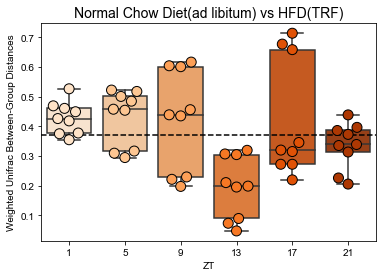

In [178]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="Oranges",
                 data=ileum_wufdmf4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="ZT", y="wUF_distance", palette="Oranges", edgecolor='k', linewidth=1, size=10,
                   data=ileum_wufdmf4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Normal Chow Diet(ad libitum) vs HFD(TRF)', fontsize=14)
ax.axhline(0.37149721419813736, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvFT_wUF_ileum_boxplot.svg', dpi=300, bbox_inches="tight")

In [179]:
#box_pair_2 = [(x[0], x[1]) for x in itertools.combinations(ileum_wufdmf4['ZT'].unique(), 2)]
#box_pair_2

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

5 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.995e-03 U_stat=7.600e+01
1 v.s. 13: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.246e-04 U_stat=8.100e+01


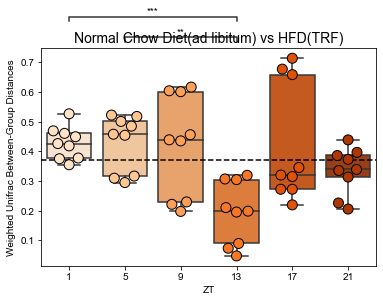

In [191]:
ax = sns.boxplot(x="ZT", y="wUF_distance", palette="Oranges",
                 data=ileum_wufdmf4, order=['1', '5', '9', '13', '17', '21'])
ax = sns.swarmplot(x="ZT", y="wUF_distance", palette="Oranges", edgecolor='k', linewidth=1, size=10,
                   data=ileum_wufdmf4, order=['1', '5', '9', '13', '17', '21'])
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Normal Chow Diet(ad libitum) vs HFD(TRF)', fontsize=14)
ax.axhline(0.37149721419813736, color='k', ls='--')

ax, test_results = add_stat_annotation(ax, data = ileum_wufdmf4, x="ZT", y="wUF_distance",
                                       order = ['1', '5', '9', '13', '17', '21'], 
                                       box_pairs = [('13', '1'), ('13', '5')],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_NAvFT_wUF_ileum_boxplot.svg', dpi=300, bbox_inches="tight")

# two together

In [181]:
trf_ileum_wufdmd2['exp'] = 'NA_v_FA'
ileum_wufdmf2['exp'] = 'NA_v_FT'

In [182]:
itwotoget = pd.concat([trf_ileum_wufdmd2, ileum_wufdmf2], sort=True)
itwotoget

,FA_timepoint,HFD_TRF,HFD_adlib,NA_timepoint,NCD_adlib,exp,timepoints,wUF_distance
0,13,NaN,FA_13,13,NA_13,NA_v_FA,13_13,0.138072
1,13,NaN,FA_13,13,NA_13,NA_v_FA,13_13,0.381779
2,13,NaN,FA_13,13,NA_13,NA_v_FA,13_13,0.321732
3,17,NaN,FA_17,13,NA_13,NA_v_FA,13_17,0.114254
4,17,NaN,FA_17,13,NA_13,NA_v_FA,13_17,0.275614
...,...,...,...,...,...,...,...,...
319,NaN,FT_5,NaN,NaN,NA_9,NA_v_FT,9_5,0.603338
320,NaN,FT_5,NaN,NaN,NA_9,NA_v_FT,9_5,0.621498
321,NaN,FT_9,NaN,NaN,NA_9,NA_v_FT,9_9,0.603853
322,NaN,FT_9,NaN,NaN,NA_9,NA_v_FT,9_9,0.600747


In [183]:
itwotoget.wUF_distance.values.mean()

0.37615802497928447

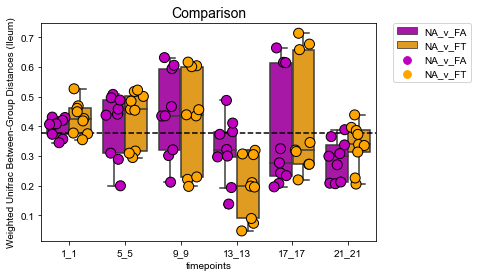

In [184]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'],
                 data=itwotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'], 
                   edgecolor='k', linewidth=1, size=10, dodge=True, jitter=0.3,
                   data=itwotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances (Ileum)')
plt.title('Comparison', fontsize=14)
ax.axhline(0.37615802497928447, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/newTRF_two_wUF_ileum_boxplot.svg', dpi=300, bbox_inches="tight")
#Only ZT13 approaching significance

In [185]:
from scipy.stats import wilcoxon
from itertools import combinations

In [186]:
tpz = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

x = itwotoget[itwotoget["exp"] == "NA_v_FA"]
y = itwotoget[itwotoget["exp"] == "NA_v_FT"]
for key in tpz:
    w = x[x["timepoints"] == key].wUF_distance.values
    z = y[y["timepoints"] == key].wUF_distance.values
    if len(w) == len(z):
        st, p = wilcoxon(w, z)
        print("ZT", key)
        print(p, st)
        print("____________________")
    else:
        print("not even", key)

ZT 1_1
0.1640625 10.0
____________________
ZT 5_5
0.09765625 8.0
____________________
ZT 9_9
0.42578125 15.0
____________________
ZT 13_13
0.07421875 7.0
____________________
ZT 17_17
0.0390625 5.0
____________________
ZT 21_21
0.09765625 8.0
____________________


In [187]:
tpz = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

x = itwotoget[itwotoget["exp"] == "NA_v_FA"]
y = itwotoget[itwotoget["exp"] == "NA_v_FT"]
for key in tpz:
    w = x[x["timepoints"] == key].wUF_distance.values
    z = y[y["timepoints"] == key].wUF_distance.values
    if len(w) == len(z):
        st, p = mannwhitneyu(w, z)
        print("ZT", key)
        print(p, st)
        print("____________________")
    else:
        print("not even", key)

ZT 1_1
0.18532630419857943 25.0
____________________
ZT 5_5
0.47992869214595724 32.0
____________________
ZT 9_9
0.859819205054158 43.0
____________________
ZT 13_13
0.052058768750600205 63.0
____________________
ZT 17_17
0.331387096247615 29.0
____________________
ZT 21_21
0.18532630419857943 25.0
____________________


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

5_5_NA_v_FA v.s. 5_5_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.200e+01
1_1_NA_v_FA v.s. 1_1_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.500e+01
9_9_NA_v_FA v.s. 9_9_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.300e+01
13_13_NA_v_FA v.s. 13_13_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.124e-01 U_stat=6.300e+01
17_17_NA_v_FA v.s. 17_17_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.900e+01
21_21_NA_v_FA v.s. 21_21_NA_v_FT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.500e+01


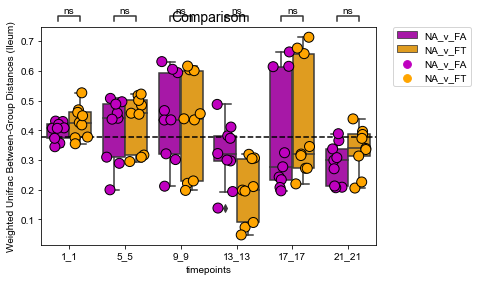

In [188]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'],
                 data=itwotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='exp', palette=['m', 'orange'], 
                   edgecolor='k', linewidth=1, size=10, dodge=True, jitter=0.3,
                   data=itwotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances (Ileum)')
plt.title('Comparison', fontsize=14)
ax.axhline(0.37615802497928447, color='k', ls='--')

box_pairz = [((tp, 'NA_v_FA'), (tp, 'NA_v_FT')) for tp in tpz]
ax, test_results = add_stat_annotation(ax, data = itwotoget, x="timepoints", y="wUF_distance", hue='exp',
                                       order = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'], 
                                       box_pairs = box_pairz,
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/newTRF_both_ileum_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

# Ileum vs Cecum - do not use, different seq methods

In [189]:
combo_metadata = pd.concat([cTRF_metadata, cTRF_metadata])
combo_metadata.head()

,group_time
#SampleID,
cFA1a,FA_13
cFA1b,FA_13
cFA1c,FA_13
cFA2a,FA_17
cFA2b,FA_17


In [190]:
TRF_wUF_dm_both_org = pd.read_csv('../data/TRF/?????', sep='\t', index_col=0)
TRF_wUF_dm_both_org.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/TRF/?????'

## NA vs FA; Ileum vs Cecum

In [ ]:
#need to load DM where they are calculated together

In [ ]:
NAFA_ileum = itwotoget[itwotoget['exp'] == 'NA_v_FA'].copy()
NAFA_cecum = twotoget[twotoget['exp'] == 'NA_v_FA'].copy()

In [ ]:
NAFA_ileum['organ'] = 'ileum'
NAFA_cecum['organ'] = 'cecum'

In [ ]:
NAFA_toget = pd.concat([NAFA_ileum, NAFA_cecum], sort=True)
NAFA_toget

In [ ]:
tpsz = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']
NAFA_toget2 = NAFA_toget[NAFA_toget['timepoints'].isin(tpsz)]
NAFA_toget2.head()

In [ ]:
NAFA_toget2.wUF_distance.mean()

In [ ]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='organ', palette=['pink', 'deeppink'],
                 data=NAFA_toget2, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='organ', palette=['pink', 'deeppink'], 
                   edgecolor='k', linewidth=1, size=10, dodge=True, jitter=0.3,
                   data=NAFA_toget2, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Comparison NA vs FA (Cecum vs Ileum)', fontsize=14)
ax.axhline(0.49151921276656685, color='k', ls='--')

#box_pairz = [((tp, 'ileum'), (tp, 'cecum')) for tp in tpz]
ax, test_results = add_stat_annotation(ax, data = NAFA_toget2, x="timepoints", y="wUF_distance", hue='organ',
                                       order = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'], 
                                       box_pairs = [(('5_5', 'ileum'), ('5_5', 'cecum')),
                                                   (('9_9', 'ileum'), ('9_9', 'cecum'))],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/newTRF_organs_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

## NA vs FT; Ileum vs Cecum

In [ ]:
#need to load DM where they are calculated together

In [ ]:
NAFT_ileum = itwotoget[itwotoget['exp'] == 'NA_v_FT'].copy()
NAFT_cecum = twotoget[twotoget['exp'] == 'NA_v_FT'].copy()

In [ ]:
NAFT_ileum['organ'] = 'ileum'
NAFT_cecum['organ'] = 'cecum'

In [ ]:
NAFT_toget = pd.concat([NAFT_ileum, NAFT_cecum], sort=True)
NAFT_toget

In [ ]:
tpsz = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']
NAFT_toget2 = NAFT_toget[NAFT_toget['timepoints'].isin(tpsz)]
NAFT_toget2.head()

In [ ]:
NAFT_toget2.wUF_distance.mean()

In [ ]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='organ', palette=['orange', 'sienna'],
                 data=NAFT_toget2, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='organ', palette=['orange', 'sienna'], 
                   edgecolor='k', linewidth=1, size=10, dodge=True, jitter=0.3,
                   data=NAFT_toget2, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Comparison NA vs FT (Cecum vs Ileum)', fontsize=14)
ax.axhline(0.48989954635750316, color='k', ls='--')

#box_pairz = [((tp, 'ileum'), (tp, 'cecum')) for tp in tpz]
ax, test_results = add_stat_annotation(ax, data = NAFT_toget2, x="timepoints", y="wUF_distance", hue='organ',
                                       order = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'], 
                                       box_pairs = [(('5_5', 'ileum'), ('5_5', 'cecum')),
                                                   (('9_9', 'ileum'), ('9_9', 'cecum')), 
                                                   (('13_13', 'ileum'), ('13_13', 'cecum'))],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/newTRF_organs_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

## Ileum and Cecum on HFD

In [ ]:
#need to load DM where they are calculated together

In [ ]:
wufdm4['organ'] = 'cecum'
wufdm4['exp'] = 'FA_v_FT'
trf_ileum_wufdm3['organ'] = 'ileum'
trf_ileum_wufdm3['exp'] = 'FA_v_FT'

In [ ]:
organ_twotoget = pd.concat([wufdm4, trf_ileum_wufdm3], sort=True)
organ_twotoget

In [ ]:
organ_twotoget.wUF_distance.values.mean()

In [ ]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='organ', palette=['teal', 'turquoise'],
                 data=organ_twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='organ', palette=['teal', 'turquoise'], 
                   edgecolor='k', linewidth=1, size=10, dodge=True, jitter=0.3,
                   data=organ_twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Comparison FA vs FT (Cecum vs Ileum)', fontsize=14)
ax.axhline(0.18448315867200724, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/newTRF_organs_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

In [ ]:
tpz = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21']

x = organ_twotoget[organ_twotoget["organ"] == "ileum"]
y = organ_twotoget[organ_twotoget["organ"] == "cecum"]
for key in tpz:
    w = x[x["timepoints"] == key].wUF_distance.values
    z = y[y["timepoints"] == key].wUF_distance.values
    if len(w) == len(z):
        st, p = wilcoxon(w, z)
        print("ZT", key)
        print(p, st)
        print("____________________")
    else:
        print("not even", key)

In [ ]:
ax = sns.boxplot(x="timepoints", y="wUF_distance", hue='organ', palette=['teal', 'turquoise'],
                 data=organ_twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
ax = sns.stripplot(x="timepoints", y="wUF_distance", hue='organ', palette=['teal', 'turquoise'], 
                   edgecolor='k', linewidth=1, size=10, dodge=True, jitter=0.3,
                   data=organ_twotoget, order=['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted Unifrac Between-Group Distances')
plt.title('Comparison FA vs FT (Cecum vs Ileum)', fontsize=14)
ax.axhline(0.18448315867200724, color='k', ls='--')

box_pairz = [((tp, 'ileum'), (tp, 'cecum')) for tp in tpz]
ax, test_results = add_stat_annotation(ax, data = organ_twotoget, x="timepoints", y="wUF_distance", hue='organ',
                                       order = ['1_1', '5_5', '9_9', '13_13', '17_17', '21_21'], 
                                       box_pairs = box_pairz,
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/newTRF_organs_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")
#Only ZT13 and ZT17